In [12]:
import pandas as pd
import requests 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_2fd09af03220406897d5d5c070bcf3cc = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='yyrFG2c8SwlYjCQOU3tFsiOuEzGwxBAWobeJ6D3qQwHa',
    ibm_auth_endpoint="https://iam.ng.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_2fd09af03220406897d5d5c070bcf3cc.get_object(Bucket='notebooks-donotdelete-pr-h1ooenheppinnz',Key='Estadisticas_Riesgos_Laborales_Positiva (1).csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body, sep=',')
df.head()


,DPTO,MPIO,CODIGO_DE_LA_ARL,AÑO_DE_INFORME,MES_DE_INFORME,ACTIVEC,RELA_DEP,RELA_INDEP,PRESUACCIDETRASUCE,MUERTES_REPOR_AT,NUEVAPENSIOINVA_R_AT,NUEVAPENSIOINVA_R_EL,INCAPERMAPARCIAR_AT,INCAPERMAPARCIAR_EL
0,Tolima,IBAGUÉ,1423,2019,11,1802201,3,0,0,0,0,0,0,0
1,Boyacá,TURMEQUÉ,1423,2019,11,3410001,2,0,0,0,0,0,0,0
2,Caldas,LA DORADA,1423,2019,11,3281101,1,5,0,0,0,0,0,0
3,Valle del Cauca,CARTAGO,1423,2019,11,2851302,0,2,0,0,0,0,0,0
4,Cundinamarca,LA PALMA,1423,2019,11,1950001,1,0,0,0,0,0,0,0


In [4]:
for x in df.columns:
    print(str(x) + ": "+ str(df[x].isna().sum()))

DPTO: 0
MPIO: 0
CODIGO_DE_LA_ARL: 0
AÑO_DE_INFORME: 0
MES_DE_INFORME: 0
ACTIVEC: 0
RELA_DEP: 0
RELA_INDEP: 0
PRESUACCIDETRASUCE: 0
MUERTES_REPOR_AT: 0
NUEVAPENSIOINVA_R_AT: 0
NUEVAPENSIOINVA_R_EL: 0
INCAPERMAPARCIAR_AT: 0
INCAPERMAPARCIAR_EL: 0


In [5]:
df.isnull().sum()

DPTO                    0
MPIO                    0
CODIGO_DE_LA_ARL        0
AÑO_DE_INFORME          0
MES_DE_INFORME          0
ACTIVEC                 0
RELA_DEP                0
RELA_INDEP              0
PRESUACCIDETRASUCE      0
MUERTES_REPOR_AT        0
NUEVAPENSIOINVA_R_AT    0
NUEVAPENSIOINVA_R_EL    0
INCAPERMAPARCIAR_AT     0
INCAPERMAPARCIAR_EL     0
dtype: int64

In [6]:
for x in df.columns[2::]:
    for j in df[x]:
        if isinstance(j, str) == True:
            print(j)
        else:
            continue
#no strings on rows thats belong to numeric columns catgories

In [7]:
df[df.duplicated(keep=False)]
#duplicates

,DPTO,MPIO,CODIGO_DE_LA_ARL,AÑO_DE_INFORME,MES_DE_INFORME,ACTIVEC,RELA_DEP,RELA_INDEP,PRESUACCIDETRASUCE,MUERTES_REPOR_AT,NUEVAPENSIOINVA_R_AT,NUEVAPENSIOINVA_R_EL,INCAPERMAPARCIAR_AT,INCAPERMAPARCIAR_EL


In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CODIGO_DE_LA_ARL,44750.0,1.423000e+03,0.000000e+00,1423.0,1423.0,1423.0,1423.0,1423.0
AÑO_DE_INFORME,44750.0,2.019000e+03,0.000000e+00,2019.0,2019.0,2019.0,2019.0,2019.0
MES_DE_INFORME,44750.0,1.100000e+01,0.000000e+00,11.0,11.0,11.0,11.0,11.0
ACTIVEC,44750.0,2.873962e+06,1.322368e+06,1014001.0,1751201.0,2521902.0,3742102.0,5930901.0
RELA_DEP,44750.0,4.844212e+01,6.093606e+02,0.0,0.0,4.0,15.0,80686.0
RELA_INDEP,44750.0,8.018503e+00,3.616710e+02,0.0,0.0,0.0,0.0,64195.0
PRESUACCIDETRASUCE,44750.0,2.414078e-01,2.900871e+00,0.0,0.0,0.0,0.0,234.0
MUERTES_REPOR_AT,44750.0,1.340782e-04,1.157857e-02,0.0,0.0,0.0,0.0,1.0
NUEVAPENSIOINVA_R_AT,44750.0,1.340782e-04,1.157857e-02,0.0,0.0,0.0,0.0,1.0
NUEVAPENSIOINVA_R_EL,44750.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0


In [9]:
df_t = df

Text(0.5, 1.03, 'Correlations')

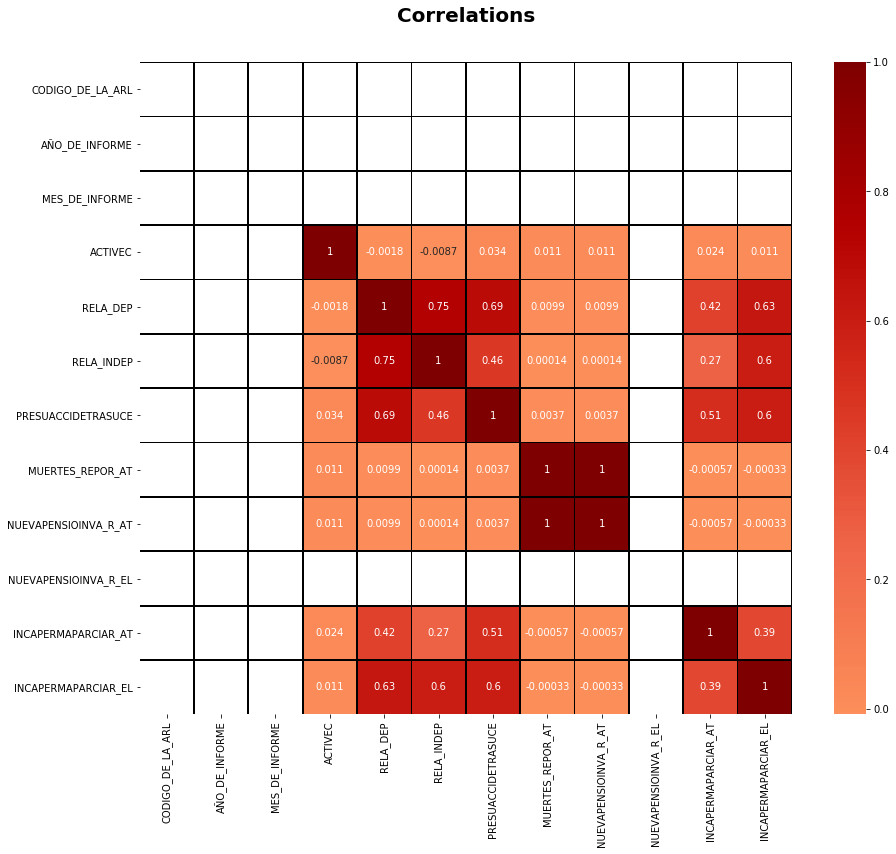

In [14]:
mask = np.zeros_like(df_t.corr(), dtype=np.bool)
## in order to reverse the bar replace "RdBu" with "RdBu_r"
plt.subplots(figsize = (15,12))
sns.heatmap(df_t.corr(), annot=True,mask = False,cmap = 'OrRd', linewidths=.7, linecolor='black',fmt='.2g',center = 0,square=True)

plt.title("Correlations", y = 1.03,fontsize = 20, fontweight = 'bold', pad = 40)

In [10]:
df_t['MUERTES_REPOR_AT'].value_counts()

0    44744
1        6
Name: MUERTES_REPOR_AT, dtype: int64

In [11]:
Feature = df_t[['NUEVAPENSIOINVA_R_AT','NUEVAPENSIOINVA_R_EL','INCAPERMAPARCIAR_AT','INCAPERMAPARCIAR_EL']]
y = df_t['MUERTES_REPOR_AT'].values

In [13]:
!conda install -c conda-forge imbalanced-learn

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - imbalanced-learn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    joblib-0.14.1              |             py_0         198 KB  conda-forge
    ca-certificates-2019.11.28 |       hecc5488_0         145 KB  conda-forge
    openssl-1.1.1f             |       h516909a_0         2.1 MB  conda-forge
    mkl-service-2.3.0          |   py36h516909a_0          64 KB  conda-forge
    imbalanced-learn-0.6.2     |             py_0          95 KB  conda-forge
    certifi-2019.11.28         |   py36h9f0ad1d_1         149 KB  conda-forge
    mkl-2019.4                 |              243       204.1 MB
    scikit-learn-0.22.1        |   py36hd81dba3_0         7.1 MB
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    ----------------------------

In [26]:
from imblearn.over_sampling import SMOTE
#creating some sintetic data
smote_algo = SMOTE(random_state=0)
smote_data_X, smote_data_y =smote_algo.fit_sample(Feature, df_t['MUERTES_REPOR_AT'].values)
smote_data_X = pd.DataFrame(data=smote_data_X, columns=Feature.columns)
smote_data_y = pd.DataFrame(data=smote_data_y, columns=['MUERTES_REPOR_AT'])
smote_data = smote_data_X
smote_data_y['MUERTES_REPOR_AT'].value_counts()

1    44744
0    44744
Name: MUERTES_REPOR_AT, dtype: int64

In [28]:
from sklearn import preprocessing

In [29]:
X= preprocessing.StandardScaler().fit(smote_data_X).transform(smote_data_X)
X[0:5]

array([[-1.        ,  0.        , -0.03483598, -0.02043787],
       [-1.        ,  0.        , -0.03483598, -0.02043787],
       [-1.        ,  0.        , -0.03483598, -0.02043787],
       [-1.        ,  0.        , -0.03483598, -0.02043787],
       [-1.        ,  0.        , -0.03483598, -0.02043787]])

In [34]:
y = smote_data_y['MUERTES_REPOR_AT'].values
y[0:5]

array([0, 0, 0, 0, 0])

In [35]:
from sklearn.tree import DecisionTreeClassifier
Tree = DecisionTreeClassifier(criterion="entropy")
Tree # it shows the default parameter

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [36]:
Tree.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [38]:
#Creating train/test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=14)
print ('Train set shape:', X_train.shape,  y_train.shape)
print ('Test set shape:', X_test.shape,  y_test.shape)

Train set shape: (71590, 4) (71590,)
Test set shape: (17898, 4) (17898,)


In [39]:
yhat=Tree.predict(X_test)

In [41]:
print(yhat[0:5]) #some predictions
print(y_test[0:5])

[0 0 0 1 1]
[0 0 0 1 1]


In [42]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [44]:
import numpy as np

Confusion matrix, without normalization
[[8827    0]
 [   0 9071]]


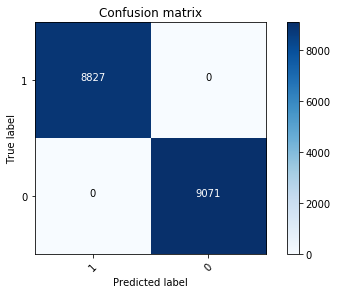

In [49]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[1,0],normalize= False,  title='Confusion matrix')

In [55]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9071
           1       1.00      1.00      1.00      8827

    accuracy                           1.00     17898
   macro avg       1.00      1.00      1.00     17898
weighted avg       1.00      1.00      1.00     17898



In [56]:
from sklearn import svm
kernels_name = ['linear','poly','rbf','sigmoid']
y_hat_2 =[]
results_2 = []
for j in kernels_name:
    y_hat_2 = svm.SVC(kernel = j).fit(X,y).predict(X_test)
    print (classification_report(y_test, y_hat_2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9071
           1       1.00      1.00      1.00      8827

    accuracy                           1.00     17898
   macro avg       1.00      1.00      1.00     17898
weighted avg       1.00      1.00      1.00     17898

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9071
           1       1.00      1.00      1.00      8827

    accuracy                           1.00     17898
   macro avg       1.00      1.00      1.00     17898
weighted avg       1.00      1.00      1.00     17898

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9071
           1       1.00      1.00      1.00      8827

    accuracy                           1.00     17898
   macro avg       1.00      1.00      1.00     17898
weighted avg       1.00      1.00      1.00     17898

              preci

In [ ]:
plt.plot(range(1,k),mean_acc,'g')
plt.ylabel('Accuracy')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()